In [1]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.stats as stats
import astropy.units as u
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
from bisect import bisect_left
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 22})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [15, 10]
from IPython.display import Audio, display
def allDone():
    display(Audio(filename='beep.mp3', autoplay=True))
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
import lmfit

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
import emcee
import corner
import numdifftools
from scipy.ndimage import interpolation
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from multiprocessing import Pool
import pickle
import h5py

In [2]:
def get_spectrum(source_id):
    path = wdtable[wdtable['source_id'] == source_id][0]['specpath']
    try:
        f = fits.open(path)
        flux = f[1].data['flux']
        loglam = f[1].data['loglam']
        f.close()
        lam = 10**loglam
    except:
        print('Spectrum file missing...')
        return
    return lam,flux

In [45]:
xdata = np.linspace(0,100,100)
def func(x,p1,p2,p3):
    return p1*x + p2 + p3*x**2
ydata = func(xdata,0.2,5,.3) + 100*np.random.randn(100)

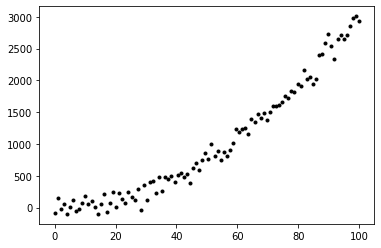

In [46]:
plt.plot(xdata,ydata,'k.')

In [85]:
def lnlike(params):
    model = func(xdata,params[0],params[1],params[2])
    diff = model - ydata
    chisq = np.sum(diff**2)
    lnlike = -0.5 * chisq
    return lnlike

def lnprior(params):
    return 0.0

def lnprob(params):
    lp = lnprior(params)
    return lp + lnlike(params)
    
p0 = np.array([.3,5.1,0.36])

ndim,nwalkers = len(p0),500

pos0 = [p0 + 1e-3*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob,threads = 1)
steps= 4000

In [86]:
%timeit s = sampler.run_mcmc(pos0,steps)

23.5 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


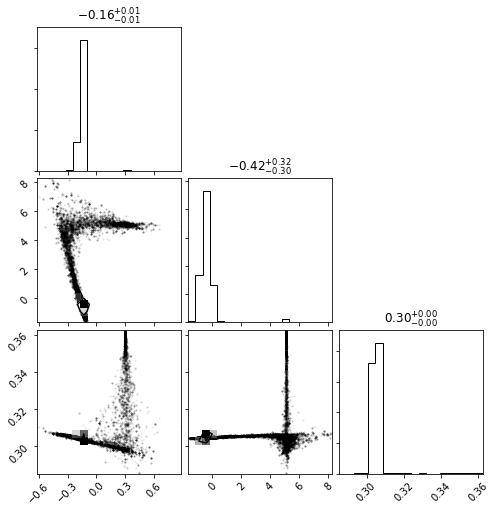

In [49]:
fig = corner.corner(sampler.flatchain,show_titles = True)

In [78]:
burn = 500
samples = sampler.chain[:, burn:, :].reshape((-1,ndim))

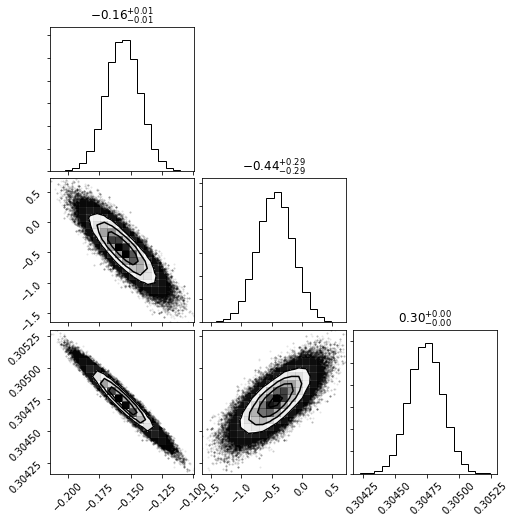

In [79]:
fig = corner.corner(samples,show_titles = True)

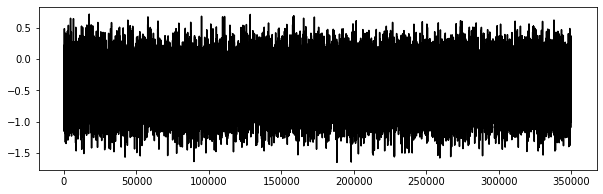

In [84]:
plt.figure(figsize=(10,3))
plt.plot(samples[:,1],'k')